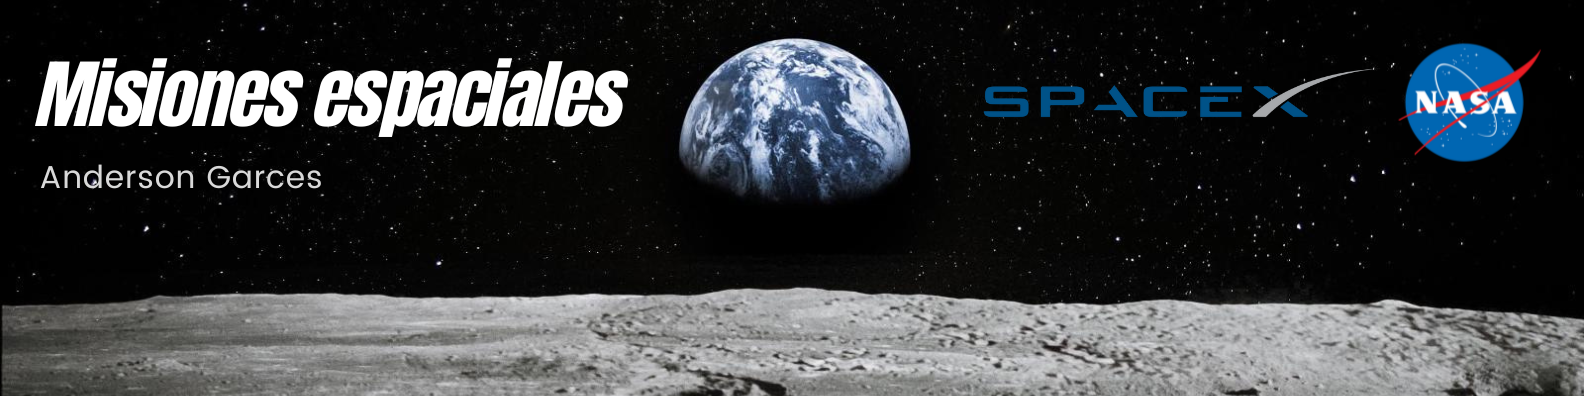

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


> #### Previo a responder las preguntas es necesario realizar un análisis exploratorio y una limpieza de datos



In [2]:
df = pd.read_csv("mission-launches.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
porcentajes_nulos = df.isnull().sum()*100/df.shape[0]
porcentajes_nulos = round(porcentajes_nulos, 2)
porcentajes_nulos

Unnamed: 0.1       0.00
Unnamed: 0         0.00
Organisation       0.00
Location           0.00
Date               0.00
Detail             0.00
Rocket_Status      0.00
Price             77.71
Mission_Status     0.00
dtype: float64

In [5]:
df["Price"].fillna(0, inplace = True)

In [6]:
porcentajes_nulos1 = df.isnull().sum()*100/df.shape[0]
porcentajes_nulos1 = round(porcentajes_nulos1, 2)
porcentajes_nulos1

Unnamed: 0.1      0.0
Unnamed: 0        0.0
Organisation      0.0
Location          0.0
Date              0.0
Detail            0.0
Rocket_Status     0.0
Price             0.0
Mission_Status    0.0
dtype: float64

---

#### Con el análisis anterior ya no hay valores nulos en la columna Price
#### Sin embargo en la columna Location hay más de un registro. Esto no permite obtener la localización exacta
#### En la columna Rocket_Status el registro está unido al 'estado' por lo que hay que separarlo
#### Y en la columna Date no está en meses por lo tanto no se podría hacer un gráfico 

> #### Por lo tanto el archivo amerita limpieza de datos

In [7]:
df['Country'] = df["Location"].str.split(',').str[-1].str.strip() 
df['Country'].sample(10)

3931    Kazakhstan
610         France
485         France
4084        Russia
2451         India
1348        France
1355        France
2603           USA
4270           USA
2550        Russia
Name: Country, dtype: object

In [8]:
df["Date"].head(5)

0    Fri Aug 07, 2020 05:12 UTC
1    Thu Aug 06, 2020 04:01 UTC
2    Tue Aug 04, 2020 23:57 UTC
3    Thu Jul 30, 2020 21:25 UTC
4    Thu Jul 30, 2020 11:50 UTC
Name: Date, dtype: object

In [9]:
df["DateTime"] = df["Date"].str[:16]
df["DateTime"] = pd.to_datetime(df["DateTime"])
df["DateTime"]

0      2020-08-07
1      2020-08-06
2      2020-08-04
3      2020-07-30
4      2020-07-30
          ...    
4319   1958-02-05
4320   1958-02-01
4321   1957-12-06
4322   1957-11-03
4323   1957-10-04
Name: DateTime, Length: 4324, dtype: datetime64[ns]

In [10]:
df["Year"] = pd.to_datetime(df["DateTime"])
df["Year"] = df["Year"].dt.year

In [11]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,DateTime,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA,2020-08-04,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30,2020


In [12]:
df_clean1 = df.drop(df.columns[:2], axis=1)
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   object        
 3   Detail          4324 non-null   object        
 4   Rocket_Status   4324 non-null   object        
 5   Price           4324 non-null   object        
 6   Mission_Status  4324 non-null   object        
 7   Country         4324 non-null   object        
 8   DateTime        4324 non-null   datetime64[ns]
 9   Year            4324 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 321.1+ KB


In [13]:
df_clean2 = df_clean1.drop(df_clean1.columns[1:4], axis=1)
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Rocket_Status   4324 non-null   object        
 2   Price           4324 non-null   object        
 3   Mission_Status  4324 non-null   object        
 4   Country         4324 non-null   object        
 5   DateTime        4324 non-null   datetime64[ns]
 6   Year            4324 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 219.7+ KB


In [14]:
df_clean3 = df_clean2.drop(df_clean2.columns[-2], axis=1)
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Rocket_Status   4324 non-null   object
 2   Price           4324 non-null   object
 3   Mission_Status  4324 non-null   object
 4   Country         4324 non-null   object
 5   Year            4324 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 185.9+ KB


In [15]:
df_clean4 = df_clean3.drop(df_clean3.columns[1], axis=1)
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Price           4324 non-null   object
 2   Mission_Status  4324 non-null   object
 3   Country         4324 non-null   object
 4   Year            4324 non-null   int32 
dtypes: int32(1), object(4)
memory usage: 152.1+ KB


In [16]:
df_clean4["Price"] = pd.to_numeric(df_clean4["Price"], errors='coerce')

df_clean4["Price"] = df_clean4["Price"].fillna(0).astype(int)

df_clean4["Price"]


0        50
1        29
2         0
3        65
4       145
       ... 
4319      0
4320      0
4321      0
4322      0
4323      0
Name: Price, Length: 4324, dtype: int64

In [17]:
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Price           4324 non-null   int64 
 2   Mission_Status  4324 non-null   object
 3   Country         4324 non-null   object
 4   Year            4324 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 152.1+ KB


## Datos limpios
#### A patir de ahora se puede obtener los resultados

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


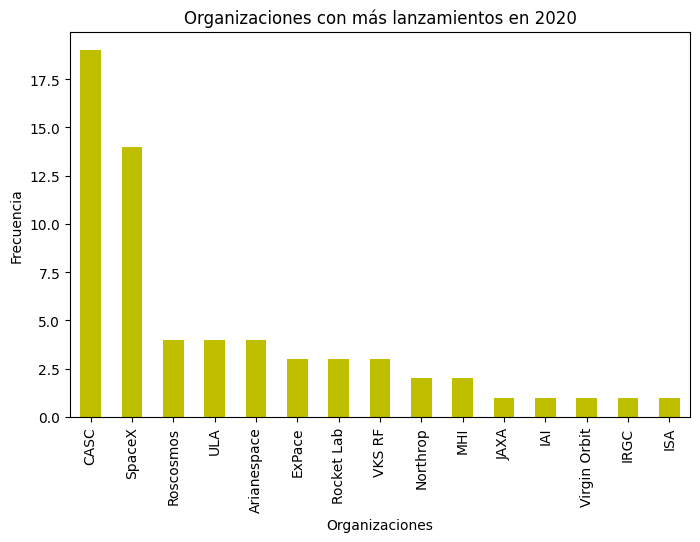

In [18]:
df_2020 = df_clean4[df_clean4["Year"] == 2020]

empleados_counts = df_2020["Organisation"].value_counts()

plt.figure(figsize=(8, 5))
empleados_counts.plot(kind='bar', color = "y")
plt.title("Organizaciones con más lanzamientos en 2020")
plt.xlabel("Organizaciones")
plt.ylabel("Frecuencia")
plt.show()

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled checked> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?




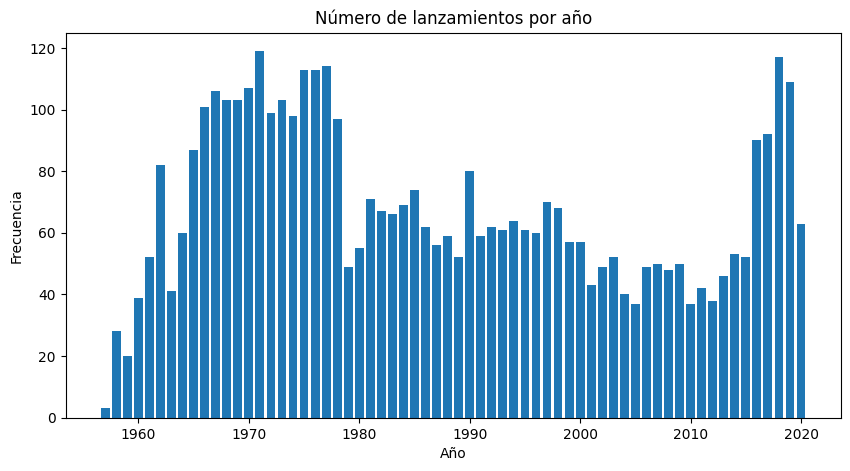

In [19]:
plt.figure(figsize=(10, 5))
numero_lanzamientos = df_clean4["Year"].value_counts()
plt.bar(numero_lanzamientos.index, numero_lanzamientos.values)
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Número de lanzamientos por año")
plt.show()

In [20]:
numero_lanzamientos = df_clean4["Year"].value_counts()
numero_lanzamientos


Year
1971    119
2018    117
1977    114
1975    113
1976    113
       ... 
2010     37
2005     37
1958     28
1959     20
1957      3
Name: count, Length: 64, dtype: int64

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled checked> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled checked> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

In [93]:
df_clean4[["Year", "Price"]].sample(5)

,Year,Price
2497,1979,0
2903,1975,0
4117,1962,0
1623,1993,0
62,2020,0


#### Es necesario considerar que no se conoce el preio para todas las organizaciones

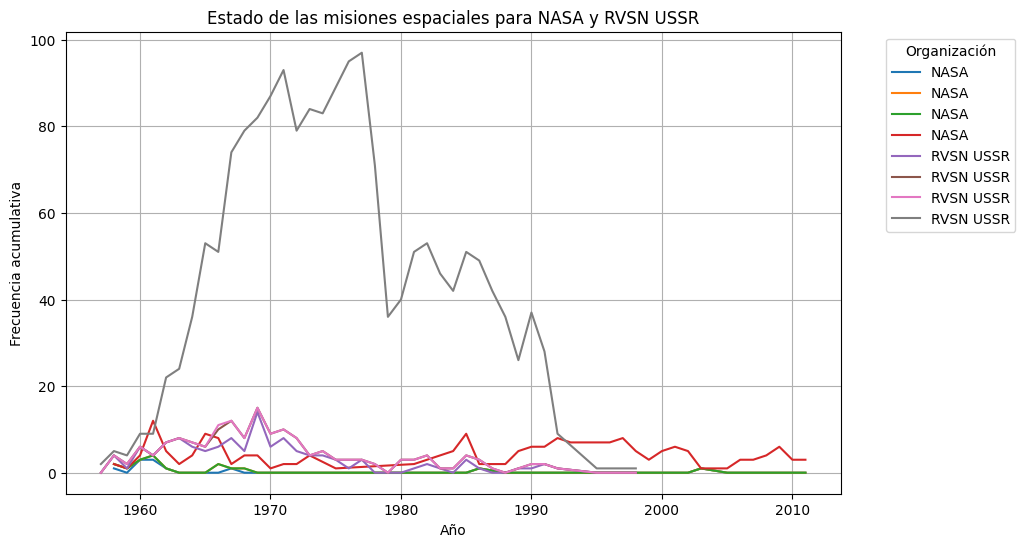

In [107]:
# Filtrar las misiones para las organizaciones específicas
mision_organizaciones = df_clean4[df_clean4["Organisation"].isin(["NASA", "RVSN USSR"])]

# Contar los valores de "Mission_Status" para cada organización y año
mision_contar = mision_organizaciones.groupby(["Year", "Organisation", "Mission_Status"]).size().unstack().fillna(0)

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))

# Iterar sobre las organizaciones para trazar líneas separadas
for org in ["NASA", "RVSN USSR"]:
    org_data = mision_contar.loc[mision_contar.index.get_level_values("Organisation") == org]
    org_data = org_data.cumsum(axis=1)  # Cumulative sum para representar el progreso a lo largo del tiempo
    plt.plot(org_data.index.get_level_values("Year"), org_data, label=org)

plt.title("Estado de las misiones espaciales para NASA y RVSN USSR")
plt.xlabel("Año")
plt.ylabel("Frecuencia acumulativa")
plt.legend(title="Organización", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [114]:
df_clean4["Mission_Status"].value_counts() 

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

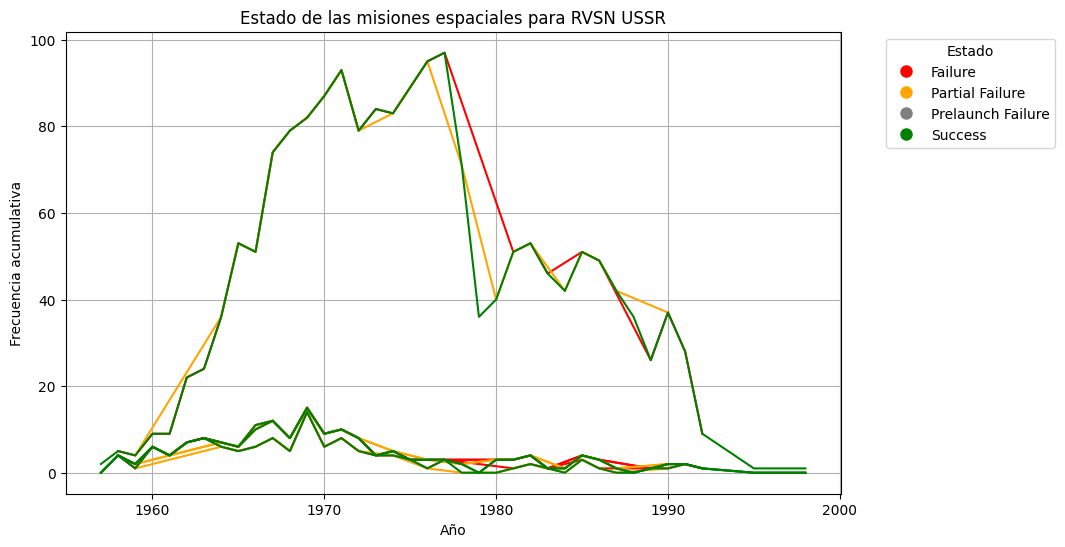

In [111]:
# Filtrar las misiones para las organizaciones específicas
mision_organizaciones = df_clean4[df_clean4["Organisation"].isin([ "RVSN USSR"])]

# Contar los valores de "Mission_Status" para cada organización y año
mision_contar = mision_organizaciones.groupby(["Year", "Organisation", "Mission_Status"]).size().unstack().fillna(0)

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))

# Definir colores para cada estado
colores = {"Success": "green", "Failure": "red", "Partial Failure": "orange", "Prelaunch Failure": "gray"}

# Iterar sobre los estados para trazar líneas separadas
for estado in mision_contar.columns:
    for org in ["NASA", "RVSN USSR"]:
        org_data = mision_contar.loc[(mision_contar.index.get_level_values("Organisation") == org) & (mision_contar[estado] > 0)]
        org_data = org_data.cumsum(axis=1)  # Cumulative sum para representar el progreso a lo largo del tiempo
        plt.plot(org_data.index.get_level_values("Year"), org_data, label=f"{org} - {estado}", color=colores[estado])

# Crear leyenda adicional para especificar colores de estado
estado_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[estado], markersize=10) for estado in mision_contar.columns]
plt.legend(estado_legend, mision_contar.columns, title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Estado de las misiones espaciales para RVSN USSR")
plt.xlabel("Año")
plt.ylabel("Frecuencia acumulativa")
plt.grid(True)
plt.show()



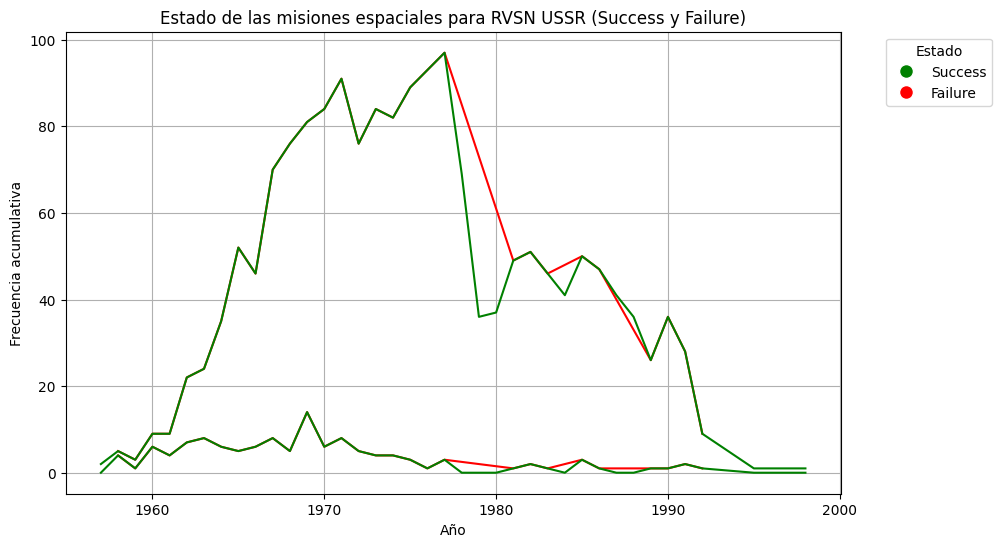

In [115]:
# Filtrar las misiones para las organizaciones específicas y estados específicos
estados_interes = ["Success", "Failure"]
mision_organizaciones = df_clean4[df_clean4["Organisation"].isin(["RVSN USSR"]) & df_clean4["Mission_Status"].isin(estados_interes)]

# Contar los valores de "Mission_Status" para cada organización y año
mision_contar = mision_organizaciones.groupby(["Year", "Organisation", "Mission_Status"]).size().unstack().fillna(0)

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))

# Definir colores para cada estado
colores = {"Success": "green", "Failure": "red"}

# Iterar sobre los estados para trazar líneas separadas
for estado in mision_contar.columns:
    for org in ["NASA", "RVSN USSR"]:
        org_data = mision_contar.loc[(mision_contar.index.get_level_values("Organisation") == org) & (mision_contar[estado] > 0)]
        org_data = org_data.cumsum(axis=1)  # Cumulative sum para representar el progreso a lo largo del tiempo
        plt.plot(org_data.index.get_level_values("Year"), org_data, label=f"{org} - {estado}", color=colores[estado])

# Crear leyenda adicional para especificar colores de estado
estado_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[estado], markersize=10) for estado in estados_interes]
plt.legend(estado_legend, estados_interes, title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Estado de las misiones espaciales para RVSN USSR (Success y Failure)")
plt.xlabel("Año")
plt.ylabel("Frecuencia acumulativa")
plt.grid(True)
plt.show()


In [103]:
df_clean4["Mission_Status"].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

Text(0.5, 1.0, 'Precio vs Año')

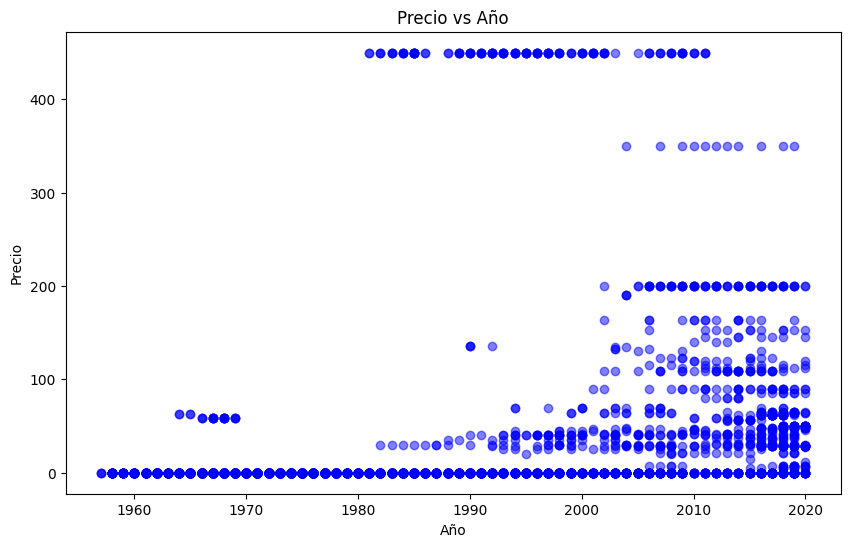

In [22]:
df_clean4["Price"] = pd.to_numeric(df_clean4["Price"], errors='coerce').fillna(0).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(df_clean4["Year"], df_clean4["Price"], alpha=0.5, color='blue')

plt.xlabel("Año")
plt.ylabel("Precio")
plt.title("Precio vs Año")

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled checked> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled checked> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled checked> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

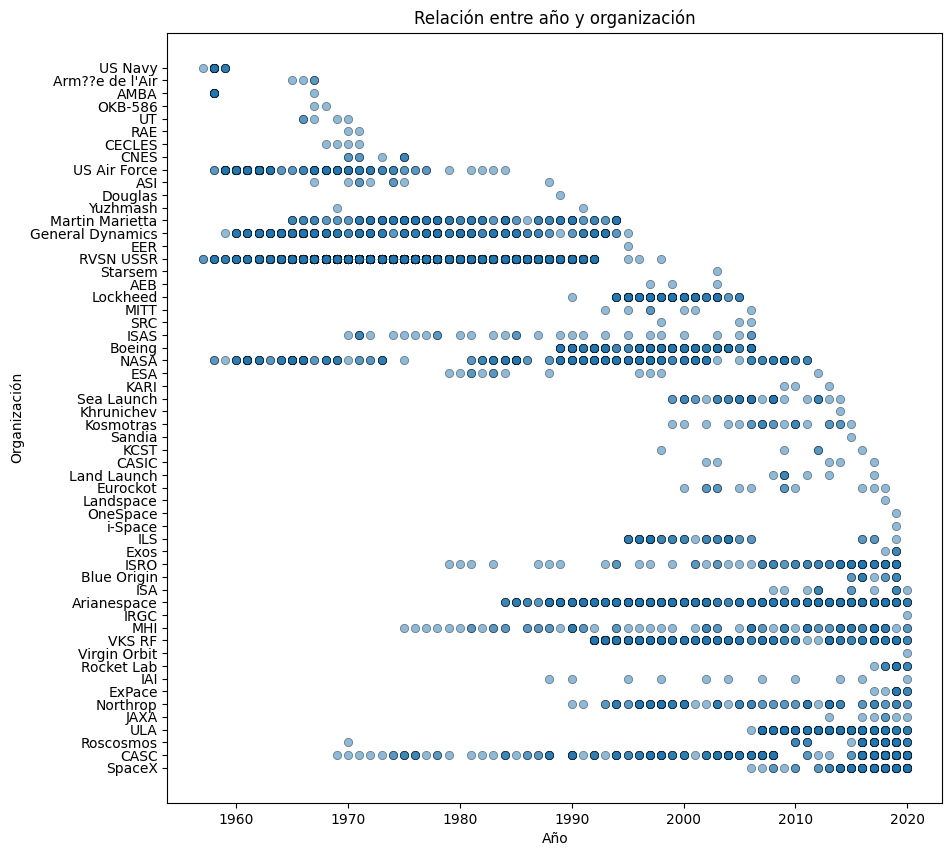

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(df_clean4["Year"], df_clean4["Organisation"], alpha=0.5, edgecolors="k", linewidth=0.5)

plt.xlabel("Año")
plt.ylabel("Organización")
plt.title("Relación entre año y organización")

plt.show()

In [24]:
import plotly.graph_objects as go

# Gráfico de dispersión interactivo
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_clean4["Year"],
    y=df_clean4["Organisation"],
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.5,
        line=dict(color='black', width=0.5)
    )
))

fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Organización",
    title="Relación entre año y organización",
    width=800,
    height=600
)

fig.show()


In [25]:
import plotly.graph_objects as go

# Calcular la cantidad de viajes por año y organización
viajes_por_ano = df_clean4.groupby(['Year', 'Organisation']).size().reset_index(name='Cantidad de Viajes')

print(viajes_por_ano)  # Asegurarse de que la columna 'Cantidad de Viajes' se haya calculado correctamente

# Fusionar la información en el DataFrame original
df_clean4 = df_clean4.merge(viajes_por_ano, on=['Year', 'Organisation'])

print(df_clean4['Cantidad de Viajes'])  # Asegurarse de que la columna 'Cantidad de Viajes' se haya fusionado correctamente

# Crear un gráfico de dispersión interactivo con etiquetas de cantidad de viajes
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_clean4["Year"],
    y=df_clean4["Organisation"],
    mode='markers',
    marker=dict(
        size=10,
        opacity=0.5,
        line=dict(color='black', width=0.5)
    ),
    text=df_clean4['Cantidad de Viajes'],
    hoverinfo='text+x+y'
))

# Establecer etiquetas y título
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Organización",
    title="Relación entre año y organización con cantidad de viajes",
    width=800,
    height=600
)

# Mostrar el gráfico interactivo
fig.show()


     Year  Organisation  Cantidad de Viajes
0    1957     RVSN USSR                   2
1    1957       US Navy                   1
2    1958          AMBA                   7
3    1958          NASA                   2
4    1958     RVSN USSR                   5
..    ...           ...                 ...
658  2020     Roscosmos                   4
659  2020        SpaceX                  14
660  2020           ULA                   4
661  2020        VKS RF                   3
662  2020  Virgin Orbit                   1

[663 rows x 3 columns]
0       14
1       14
2       14
3       14
4       14
        ..
4319    12
4320    12
4321     1
4322     2
4323     2
Name: Cantidad de Viajes, Length: 4324, dtype: int64


In [38]:
import plotly.express as px

# Calcular la cantidad de viajes por año y organización
viajes_por_ano = df_clean4.groupby(['Year', 'Organisation']).size().reset_index(name='Cantidad de Viajes')

print(viajes_por_ano)  # Asegurarse de que la columna 'Cantidad de Viajes' se haya calculado correctamente

# Fusionar la información en el DataFrame original
df_clean4 = df_clean4.merge(viajes_por_ano, on=['Year', 'Organisation'])

print(df_clean4['Cantidad de Viajes'])  # Asegurarse de que la columna 'Cantidad de Viajes' se haya fusionado correctamente

# Crear un gráfico de dispersión interactivo con etiquetas de cantidad de viajes usando plotly express
fig = px.scatter(
    df_clean4,
    x="Year",
    y="Organisation",
    size="Cantidad de Viajes",
    color="Cantidad de Viajes",
    hover_name="Organisation",
    labels={"Cantidad de Viajes": "Cantidad de Viajes"},
    title="Relación entre año y organización con cantidad de viajes",
     template= 'ggplot2'
)

# Mostrar el gráfico interactivo
fig.show()


     Year  Organisation  Cantidad de Viajes
0    1957     RVSN USSR                   2
1    1957       US Navy                   1
2    1958          AMBA                   7
3    1958          NASA                   2
4    1958     RVSN USSR                   5
..    ...           ...                 ...
658  2020     Roscosmos                   4
659  2020        SpaceX                  14
660  2020           ULA                   4
661  2020        VKS RF                   3
662  2020  Virgin Orbit                   1

[663 rows x 3 columns]
0       14
1       14
2       14
3       14
4       14
        ..
4319    12
4320    12
4321     1
4322     2
4323     2
Name: Cantidad de Viajes, Length: 4324, dtype: int64


<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled checked> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled checked> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled checked> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled checked> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

In [ ]:
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Organisation        4324 non-null   object
 1   Price               4324 non-null   int64 
 2   Mission_Status      4324 non-null   object
 3   Country             4324 non-null   object
 4   Year                4324 non-null   int32 
 5   Cantidad de Viajes  4324 non-null   int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 185.9+ KB


In [ ]:
df_clean4[["Year","Mission_Status"]] 

,Year,Mission_Status
0,2020,Success
1,2020,Success
2,2020,Success
3,2020,Success
4,2020,Success
...,...,...
4319,1958,Success
4320,1958,Failure
4321,1957,Failure
4322,1957,Success


In [ ]:
df_clean4.groupby("Year")["Mission_Status"].value_counts()

Year  Mission_Status   
1957  Success               2
      Failure               1
1958  Failure              20
      Success               6
      Partial Failure       2
                           ..
2019  Failure               6
      Partial Failure       2
      Prelaunch Failure     1
2020  Success              57
      Failure               6
Name: count, Length: 178, dtype: int64

In [ ]:
df_clean4["Mission_Status"].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [ ]:
df_misiones = df_clean4[["Year", "Mission_Status"]]
df_misiones 

,Year,Mission_Status
0,2020,Success
1,2020,Success
2,2020,Success
3,2020,Success
4,2020,Success
...,...,...
4319,1958,Success
4320,1958,Failure
4321,1957,Failure
4322,1957,Success


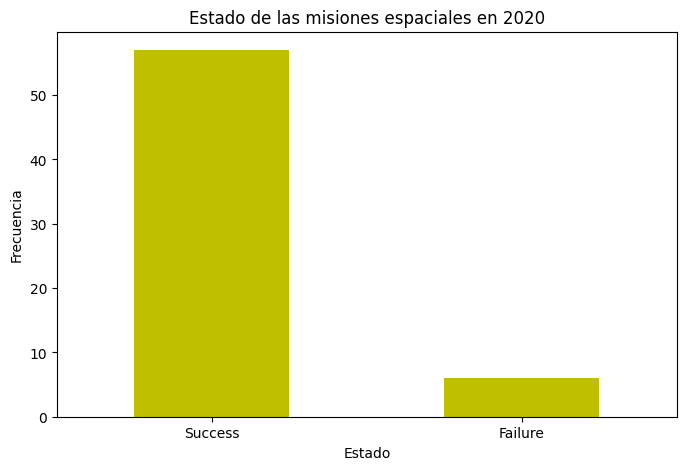

In [ ]:
mision_2020 = df_clean4[df_clean4["Year"] == 2020]

mision_contar = mision_2020["Mission_Status"].value_counts()

plt.figure(figsize=(8, 5))
mision_contar.plot(kind='bar', color = "y")
plt.title("Estado de las misiones espaciales en 2020")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

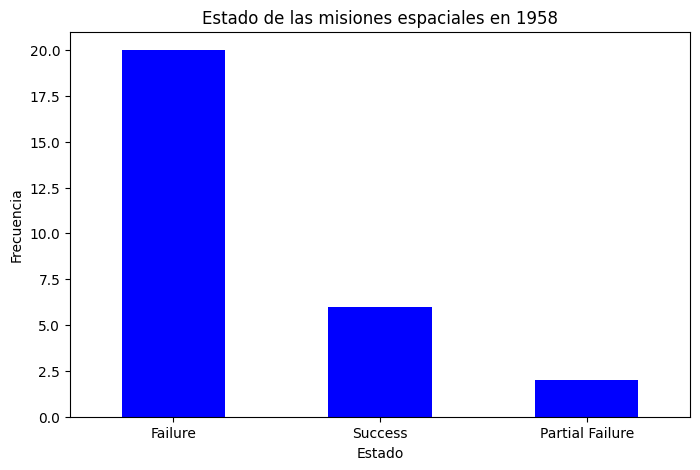

In [ ]:
mision_1958 = df_clean4[df_clean4["Year"] == 1958]

mision_contar1 = mision_1958["Mission_Status"].value_counts()

plt.figure(figsize=(8, 5))
mision_contar1.plot(kind='bar', color = "blue")
plt.title("Estado de las misiones espaciales en 1958")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

<Figure size 800x500 with 0 Axes>

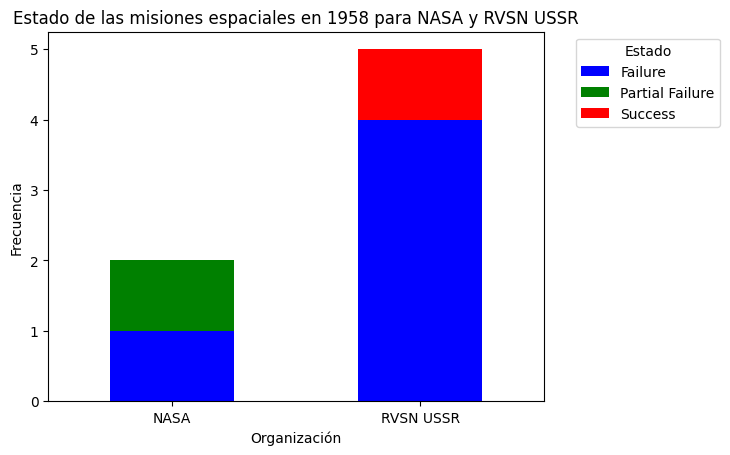

In [64]:
# Filtrar las misiones para el año 1958 y las organizaciones específicas
mision_1958 = df_clean4[df_clean4["Year"] == 1958]
mision_organizaciones = mision_1958[mision_1958["Organisation"].isin(["NASA", "RVSN USSR"])]

# Contar los valores de "Mission_Status" para cada organización
mision_contar = mision_organizaciones.groupby(["Organisation", "Mission_Status"]).size().unstack()

# Crear gráfico de barras apiladas
plt.figure(figsize=(8, 5))
mision_contar.plot(kind='bar', stacked=True, color=["blue", "green", "red"])
plt.title("Estado de las misiones espaciales en 1958 para NASA y RVSN USSR")
plt.xlabel("Organización")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 800x500 with 0 Axes>

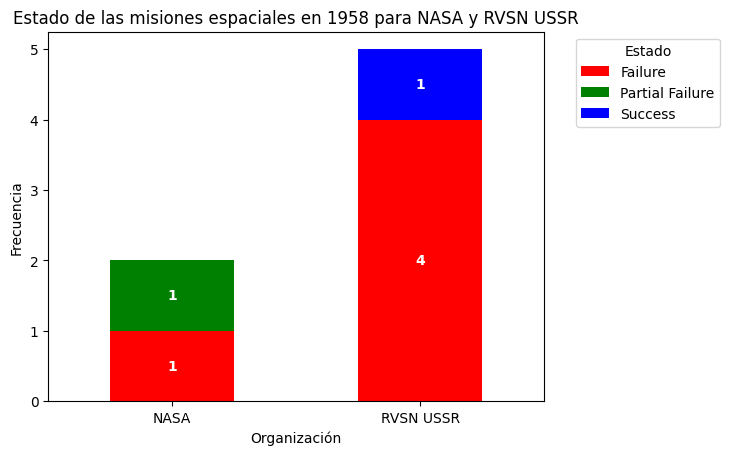

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que df_clean4 es tu DataFrame con los datos proporcionados

# Filtrar las misiones para el año 1958 y las organizaciones específicas
mision_1958 = df_clean4[df_clean4["Year"] == 1958]
mision_organizaciones = mision_1958[mision_1958["Organisation"].isin(["NASA", "RVSN USSR"])]

# Contar los valores de "Mission_Status" para cada organización
mision_contar = mision_organizaciones.groupby(["Organisation", "Mission_Status"]).size().unstack()

# Eliminar columnas con valores nulos (cero en este caso)
mision_contar = mision_contar.dropna(axis=1, how='all')

plt.figure(figsize=(8, 5))
ax = mision_contar.plot(kind='bar', stacked=True, color=["red", "green", "blue"])
plt.title("Estado de las misiones espaciales en 1958 para NASA y RVSN USSR")
plt.xlabel("Organización")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar etiquetas en las barras apiladas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height != 0:  # Omitir etiquetas para barras con altura cero
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', fontweight='bold')

plt.show()



In [58]:
result = df_clean4.groupby(["Year", "Mission_Status", "Organisation"]).size()

# Ordenar el resultado por el índice (Year) y luego por los valores de Mission_Status y Country
result_sorted = result.sort_index(level=["Year", "Mission_Status", "Organisation"])

result_sorted.head(20)

Year  Mission_Status   Organisation    
1957  Failure          US Navy              1
      Success          RVSN USSR            2
1958  Failure          AMBA                 3
                       NASA                 1
                       RVSN USSR            4
                       US Air Force         1
                       US Navy             11
      Partial Failure  AMBA                 1
                       NASA                 1
      Success          AMBA                 3
                       RVSN USSR            1
                       US Air Force         1
                       US Navy              1
1959  Failure          General Dynamics     1
                       RVSN USSR            1
                       US Air Force         5
                       US Navy              2
      Partial Failure  NASA                 1
                       RVSN USSR            1
                       US Navy              1
dtype: int64

<Figure size 800x500 with 0 Axes>

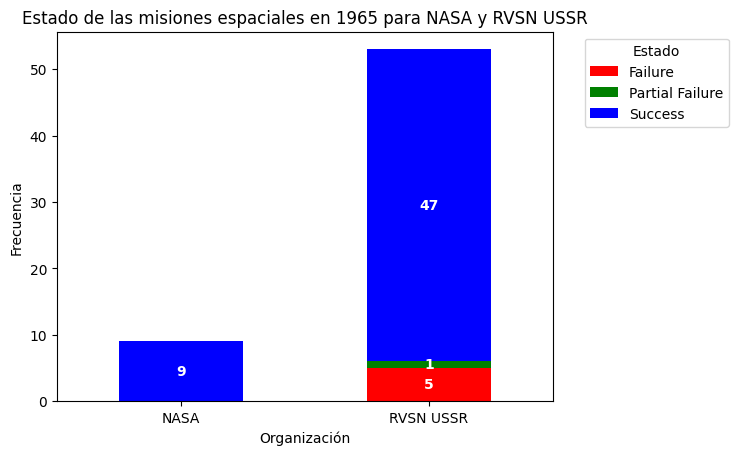

In [79]:
mision_1965 = df_clean4[df_clean4["Year"] == 1965]
mision_organizaciones = mision_1965[mision_1965["Organisation"].isin(["NASA", "RVSN USSR"])]

# Contar los valores de "Mission_Status" para cada organización
mision_contar = mision_organizaciones.groupby(["Organisation", "Mission_Status"]).size().unstack()

plt.figure(figsize=(8, 5))
ax = mision_contar.plot(kind='bar', stacked=True, color=["r", "g", "b"])
plt.title("Estado de las misiones espaciales en 1965 para NASA y RVSN USSR")
plt.xlabel("Organización")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar etiquetas en las barras apiladas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height != 0:  # Omitir etiquetas para barras con altura cero
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', fontweight='bold')
    

plt.show()


<Figure size 800x500 with 0 Axes>

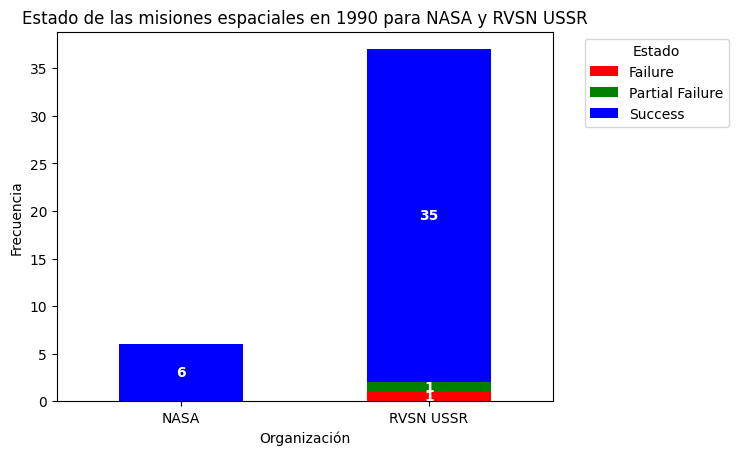

In [82]:
mision_1990 = df_clean4[df_clean4["Year"] == 1990]
mision_organizaciones = mision_1990[mision_1990["Organisation"].isin(["NASA", "RVSN USSR"])]

# Contar los valores de "Mission_Status" para cada organización
mision_contar = mision_organizaciones.groupby(["Organisation", "Mission_Status"]).size().unstack()

plt.figure(figsize=(8, 5))
ax = mision_contar.plot(kind='bar', stacked=True, color=["r", "g", "b"])
plt.title("Estado de las misiones espaciales en 1990 para NASA y RVSN USSR")
plt.xlabel("Organización")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar etiquetas en las barras apiladas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height != 0:  # Omitir etiquetas para barras con altura cero
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', color='white', fontweight='bold')
    

plt.show()

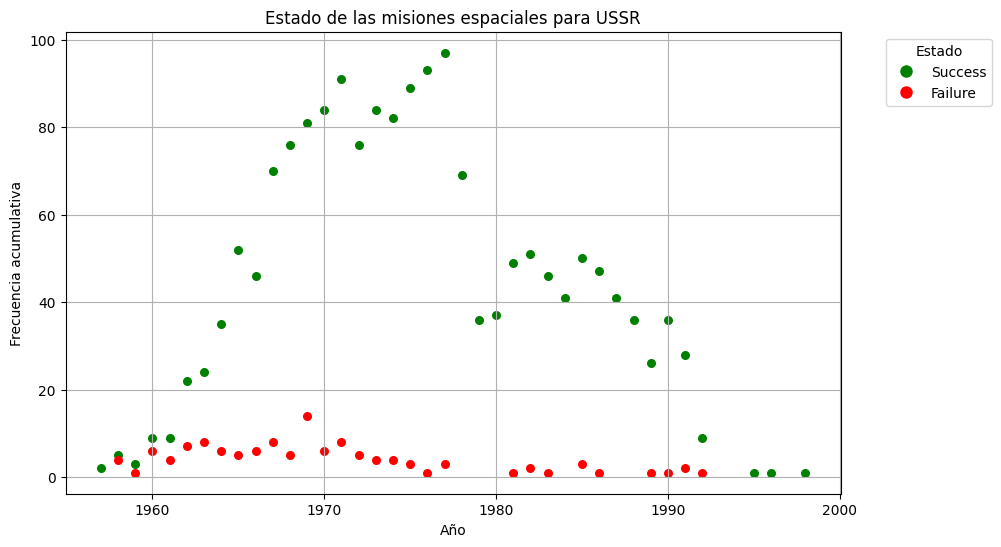

In [131]:
estados_interes = ["Success", "Failure"]
mision_organizaciones = df_clean4[df_clean4["Organisation"].isin(["RVSN USSR"]) & df_clean4["Mission_Status"].isin(estados_interes)]

# Contar los valores de "Mission_Status" para cada organización y año
mision_contar = mision_organizaciones.groupby(["Year", "Organisation", "Mission_Status"]).size().unstack().fillna(0)

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))

# Definir colores para cada estado
colores = {"Success": "green", "Failure": "red"}

# Iterar sobre los estados para trazar líneas separadas
for estado in estados_interes:
    for org in ["RVSN USSR"]:
        org_data = mision_contar.loc[(mision_contar.index.get_level_values("Organisation") == org) & (mision_contar[estado] > 0)]
        org_data = org_data.cumsum(axis=1).fillna(0)  # Acumular y rellenar NaN con ceros
        plt.scatter(org_data.index.get_level_values("Year"), org_data[estado], label=f"{org} - {estado}", color=colores[estado], s=30)

# Crear leyenda adicional para especificar colores de estado
estado_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[estado], markersize=10) for estado in estados_interes]
plt.legend(estado_legend, estados_interes, title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Estado de las misiones espaciales para USSR")
plt.xlabel("Año")
plt.ylabel("Frecuencia acumulativa")
plt.grid(True)
plt.show()




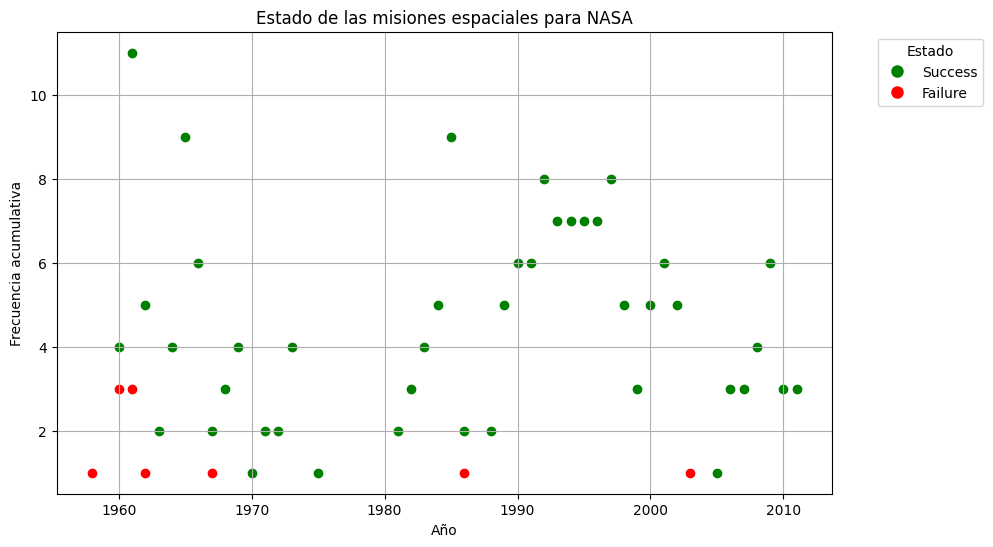

In [126]:
# Filtrar las misiones para las organizaciones específicas y estados específicos
estados_interes1 = ["Success", "Failure"]
mision_organizaciones1 = df_clean4[df_clean4["Organisation"].isin(["NASA"]) & df_clean4["Mission_Status"].isin(estados_interes1)]

# Contar los valores de "Mission_Status" para cada organización y año
mision_contar = mision_organizaciones1.groupby(["Year", "Organisation", "Mission_Status"]).size().unstack().fillna(0)

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))

# Definir colores para cada estado
colores = {"Success": "green", "Failure": "red"}

# Iterar sobre los estados para trazar líneas separadas
for estado in estados_interes:
    for org in ["NASA"]:
        org_data = mision_contar.loc[(mision_contar.index.get_level_values("Organisation") == org) & (mision_contar[estado] > 0)]
        org_data = org_data.cumsum(axis=1).fillna(0)  # Acumular y rellenar NaN con ceros
        plt.scatter(org_data.index.get_level_values("Year"), org_data[estado], label=f"{org} - {estado}", color=colores[estado])

# Crear leyenda adicional para especificar colores de estado
estado_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[estado], markersize=10) for estado in estados_interes]
plt.legend(estado_legend, estados_interes, title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Estado de las misiones espaciales para NASA")
plt.xlabel("Año")
plt.ylabel("Frecuencia acumulativa")
plt.grid(True)
plt.show()


In [31]:
df_clean4.groupby("Year")[["Mission_Status", "Country"]].value_counts()

Year  Mission_Status  Country                  
1957  Success         Kazakhstan                    2
      Failure         USA                           1
1958  Failure         USA                          16
      Success         USA                           5
      Failure         Kazakhstan                    4
                                                   ..
2020  Success         Shahrud Missile Test Site     1
                      Israel                        1
      Failure         Iran                          1
                      New Zealand                   1
                      USA                           1
Name: count, Length: 638, dtype: int64

In [36]:
result = df_clean4.groupby(["Year", "Mission_Status", "Country"]).size()

# Ordenar el resultado por el índice (Year) y luego por los valores de Mission_Status y Country
result_sorted = result.sort_index(level=["Year", "Mission_Status", "Country"])

result_sorted.head(20)

Year  Mission_Status   Country   
1957  Failure          USA            1
      Success          Kazakhstan     2
1958  Failure          Kazakhstan     4
                       USA           16
      Partial Failure  USA            2
      Success          Kazakhstan     1
                       USA            5
1959  Failure          Kazakhstan     1
                       USA            8
      Partial Failure  Kazakhstan     1
                       USA            2
      Success          Kazakhstan     2
                       USA            6
1960  Failure          Kazakhstan     6
                       USA           14
      Success          Kazakhstan     3
                       USA           16
1961  Failure          Kazakhstan     2
                       Russia         2
                       USA           13
dtype: int64

> ### Por lo tanto se puede conlcuir que las misones espaciales han tenido más éxito a medida que pasa el tiempo.
### Es necesario resaltar que esta conclusión es en base a todas las organizaciones dedicadas a lanzamientos espaciales.


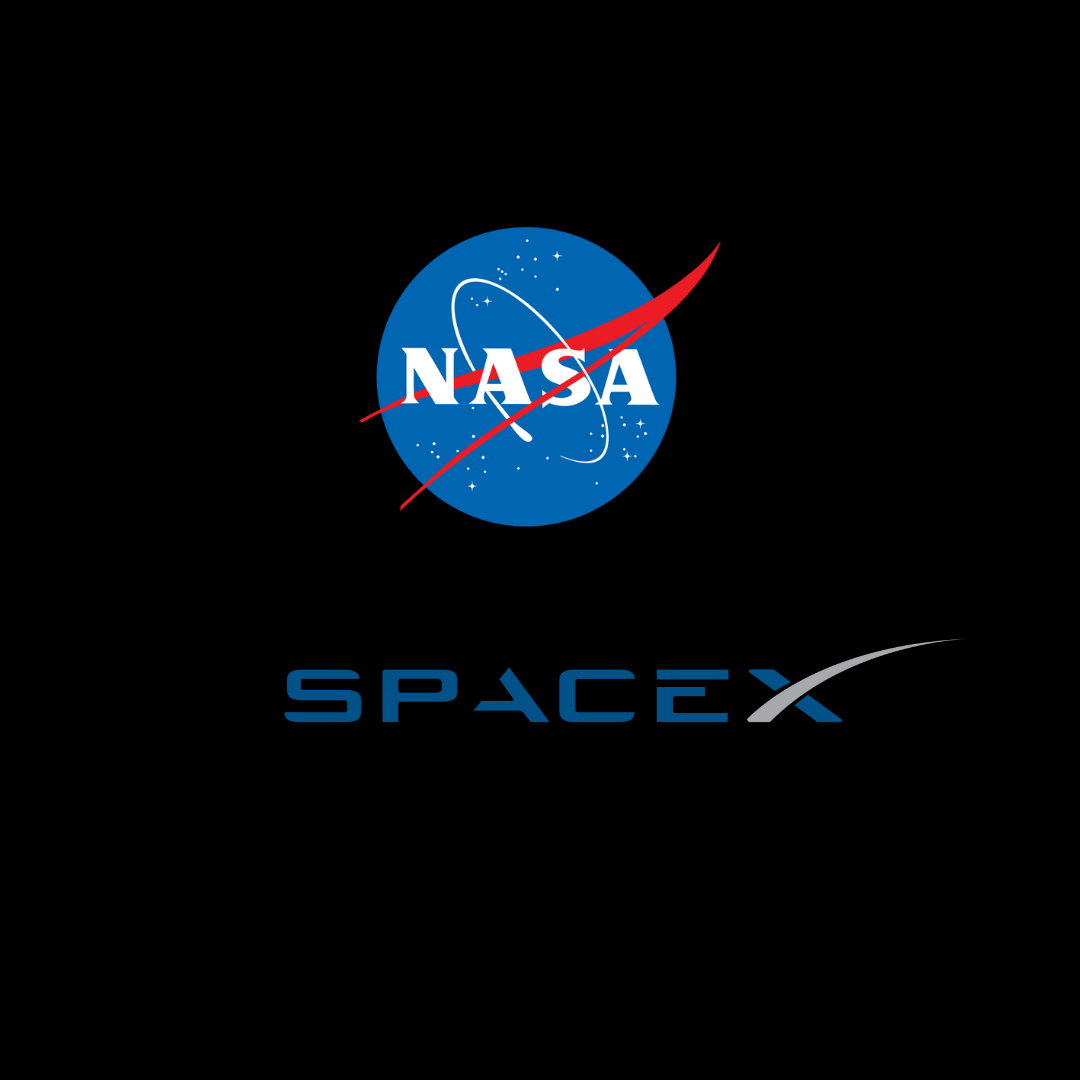

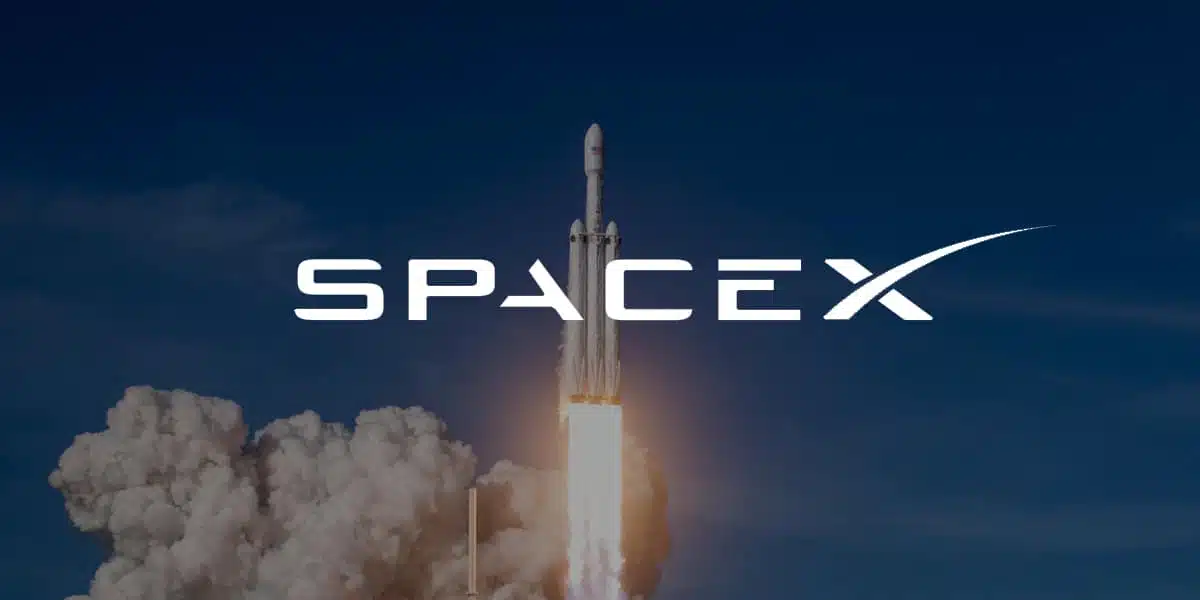

In [ ]:
# ruta_destino = "/Users/andersongarcesmolina/Library/Mobile Documents/com~apple~CloudDocs/Become a data Analyst/Data Analysis python/space-data/space-limpio.csv"

# df_clean4.to_csv(ruta_destino, index=False)

# print(f"DataFrame exportado a {ruta_destino}")